# Women's World Cup 2023

Here, I will use some statistics from this World Cup (as well as the last women's and men's cups and the women's world rankings at the start of the tournament) along with some social data (gender equity, GDP/capita) to explore the relationships between these numbers. Then, I build a linear regression model to see how well GDP/capita can be predicted from a country's sports performances.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = 'https://fbref.com/en/comps/106/Womens-World-Cup-Stats'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [8]:
table = soup.find_all('table')[8] #Group results tables are indices 0-7

In [29]:
th_elements = table.find_all('th')

In [56]:
init_cols = [th['aria-label'] for th in th_elements if 'aria-label' in th.attrs][1:15]

In [58]:
df = pd.DataFrame(columns=init_cols)

In [49]:
column_data = table.find_all('tr')

In [63]:
for row in column_data:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data][0:14]
    
    if any(individual_row_data): #appends results into dataframe
        length = len(df)
        df.loc[length] = individual_row_data

In [69]:
#removing country tag from squad names
df['Squad'] = df['Squad'].str[3:]

In [72]:
#removing irrelevant/redundant columns 
df.drop(['Matches Played', 'Wins', 'Draws', 'Losses', 'Goal Difference', 'Points',
        'xG', 'xG Allowed', 'xG Difference', 'Notes'], axis=1, inplace=True)

In [94]:
df['Gender Equity'] = [
    -0.070,  # Spain
    -0.109,  # England
    -0.045,  # Sweden
    -0.097,  # Australia
    -0.043,  # Netherlands
    -0.075,  # Japan
    -0.049,  # France
    -0.428,  # Colombia
    -0.406,  # South Africa
    -0.204,  # USA
    -0.038,  # Norway
    -0.639,  # Nigeria
    -0.454,  # Morocco
    -0.396,  # Jamaica
    -0.043,  # Denmark
    -0.025,  # Switzerland
    -0.539,  # Zambia
    -0.296,  # Vietnam
    -0.079,  # Portugal
    -0.430,  # Philippines
    -0.407,  # Panama
    -0.094,  # New Zealand
    -0.047,  # South Korea
    -0.069,  # Italy
    -0.115,  # Ireland
    -0.636,  # Haiti
    -0.084,  # Germany
    -0.288,  # Costa Rica
    -0.168,  # China
    -0.080,  # Canada
    -0.408,  # Brazil
    -0.328,  # Argentina
] #gii #This process was repeated for the GDP and others sports stats.

In [77]:
df['Women 2023 Results'] = [5] + [4] + [3] * 2 + [2] * 4 + [1] * 8 + [0] * 16

In [104]:
df = df[['Squad', 'Goals For', 'Goals Against', 'xG Difference/90', 'Gender Equity', 'GDP per Capita','European','Women 2019 Results','Men 2022 Results','Women Rankings','Women 2023 Results']]

In [111]:
df['Goals For'] = df['Goals For'].astype(int)
df['Goals Against'] = df['Goals Against'].astype(int)
df['xG Difference/90'] = df['xG Difference/90'].astype(float)
#converting strings to numeric types 

In [158]:
df

,Squad,Goals For,Goals Against,xG Difference/90,Gender Equity,GDP per Capita,European,Women 2019 Results,Men 2022 Results,Women Rankings,Women 2023 Results
0,Spain,18,7,2.35,-0.070,31223,True,1,1,6,5
1,England,13,4,0.45,-0.109,46371,True,3,2,4,4
2,Sweden,14,4,0.78,-0.045,55395,True,3,-1,3,3
3,Australia,10,8,0.43,-0.097,64964,False,1,1,10,3
4,Japan,15,3,1.75,-0.075,35385,False,1,1,11,2
5,France,12,4,1.39,-0.049,44408,True,2,4,5,2
6,Netherlands,12,3,0.65,-0.043,61098,True,4,2,9,2
7,Colombia,6,4,-0.43,-0.428,6417,False,-1,-1,25,2
8,USA,4,1,1.90,-0.204,80034,False,5,1,1,1
9,Nigeria,3,2,-0.21,-0.639,2280,False,1,-1,40,1


This is the dataframe I will work with. I start with the typical exploratory data analysis methods. 

In [160]:
df.describe()

,Goals For,Goals Against,xG Difference/90,Gender Equity,GDP per Capita,Women 2019 Results,Men 2022 Results,Women Rankings,Women 2023 Results
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5.125000,5.125000,-0.242812,-0.224656,36177.437500,0.562500,0.343750,24.531250,0.968750
std,4.975748,3.149501,1.596440,0.193021,32058.404622,1.644885,1.638437,20.588102,1.307161
min,0.000000,1.000000,-4.570000,-0.639000,1423.000000,-1.000000,-1.000000,1.000000,0.000000
25%,1.750000,3.000000,-0.820000,-0.406250,6468.000000,-1.000000,-1.000000,8.750000,0.000000
50%,3.000000,4.000000,-0.250000,-0.112000,32308.000000,0.000000,0.000000,18.500000,0.500000
75%,7.250000,8.000000,0.802500,-0.069750,53390.250000,1.250000,1.000000,37.000000,1.250000
max,18.000000,12.000000,2.350000,-0.025000,114581.000000,5.000000,5.000000,77.000000,5.000000


In [166]:
df.drop(['Squad', 'European'], axis=1).corr()

,Goals For,Goals Against,xG Difference/90,Gender Equity,GDP per Capita,Women 2019 Results,Men 2022 Results,Women Rankings,Women 2023 Results
Goals For,1.000000,-0.120419,0.623239,0.429435,0.229805,0.578392,0.283410,-0.517094,0.863599
Goals Against,-0.120419,1.000000,-0.684355,-0.273825,-0.365400,-0.368935,-0.158625,0.519810,-0.077376
xG Difference/90,0.623239,-0.684355,1.000000,0.516931,0.442019,0.630315,0.345695,-0.707639,0.494771
Gender Equity,0.429435,-0.273825,0.516931,1.000000,0.731363,0.417866,0.222690,-0.785285,0.301389
GDP per Capita,0.229805,-0.365400,0.442019,0.731363,1.000000,0.375380,0.041955,-0.593619,0.187301
Women 2019 Results,0.578392,-0.368935,0.630315,0.417866,0.375380,1.000000,0.213205,-0.650173,0.428519
Men 2022 Results,0.283410,-0.158625,0.345695,0.222690,0.041955,0.213205,1.000000,-0.248487,0.231106
Women Rankings,-0.517094,0.519810,-0.707639,-0.785285,-0.593619,-0.650173,-0.248487,1.000000,-0.384130
Women 2023 Results,0.863599,-0.077376,0.494771,0.301389,0.187301,0.428519,0.231106,-0.384130,1.000000


So we can see here that unsurprisingly, the stats from the actual tournament (Goals For and Expected Goal Difference over 90 Minutes) are the strongest correlations to this years World Cup results. World ranking and the previous women's world cup results are somewhat stronger, while weaker are the GDP/capita, men's world cup, and gender equity index. 

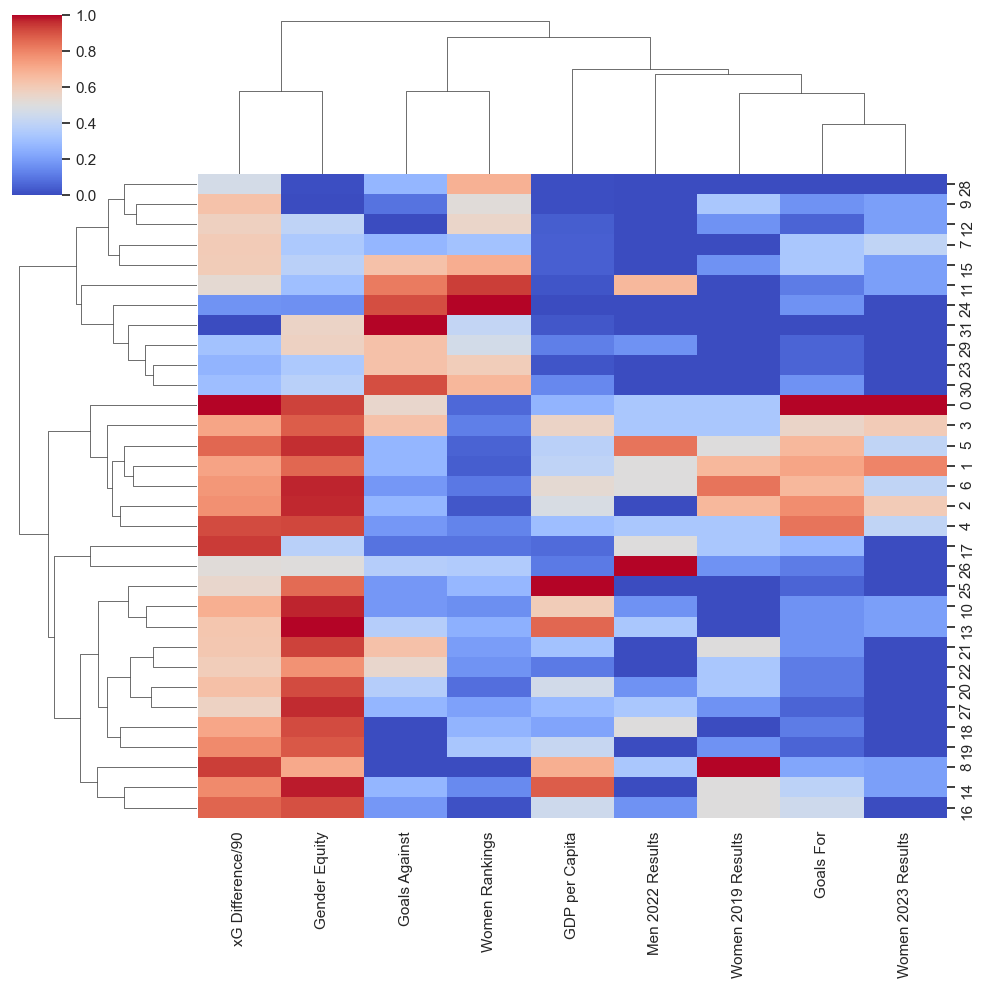

In [170]:
sns.clustermap(df.drop(['Squad', 'European'], axis=1),standard_scale = 1,cmap='coolwarm')

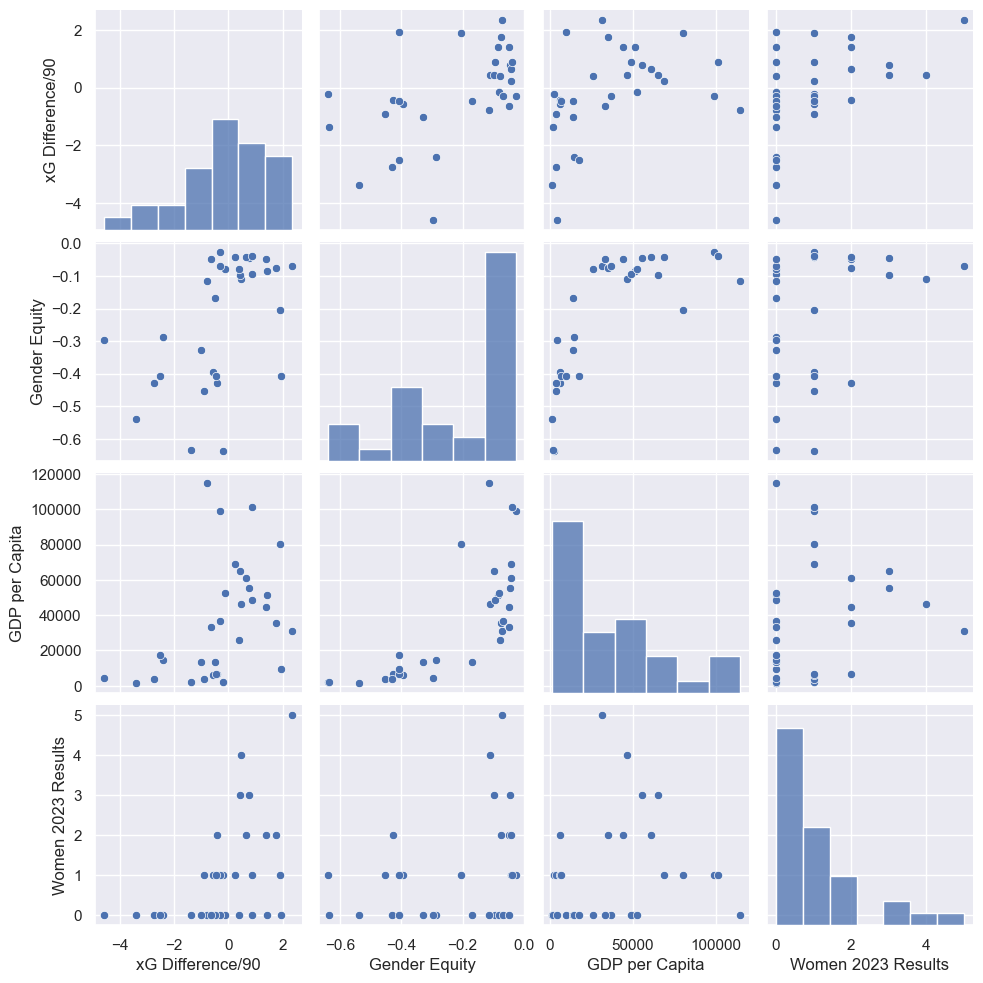

In [157]:
sns.pairplot(df[['xG Difference/90','Gender Equity','GDP per Capita','Women 2023 Results']],)

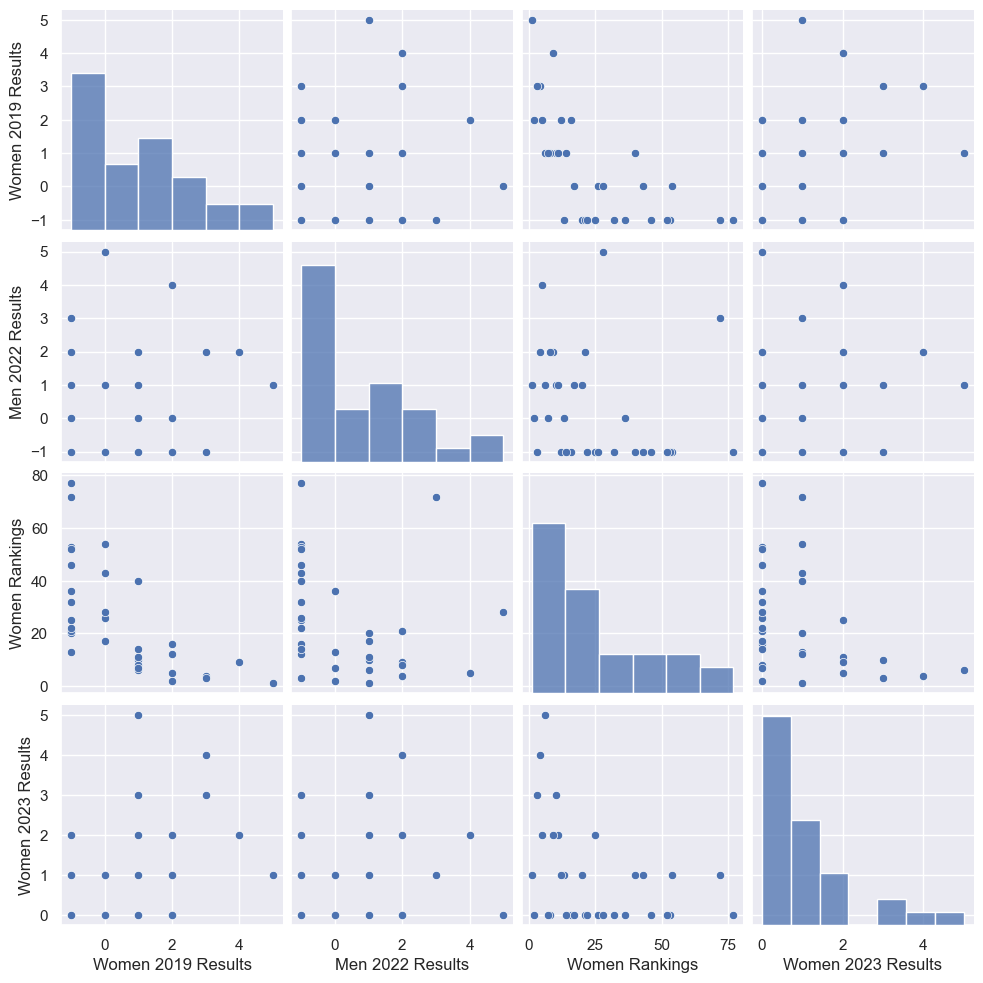

In [156]:
sns.pairplot(df[['Women 2019 Results','Men 2022 Results','Women Rankings','Women 2023 Results']],)

Nothing from these pairplots stands out too much compared to the correlation table.

<Axes: xlabel='Women 2023 Results', ylabel='count'>

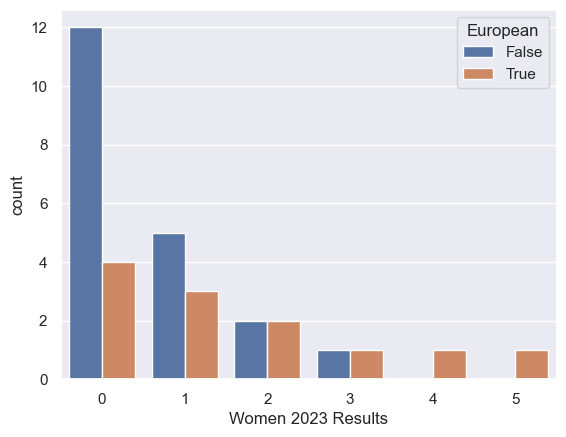

In [155]:
sns.countplot(df, x='Women 2023 Results', hue='European')

<Axes: xlabel='Women 2023 Results', ylabel='GDP per Capita'>

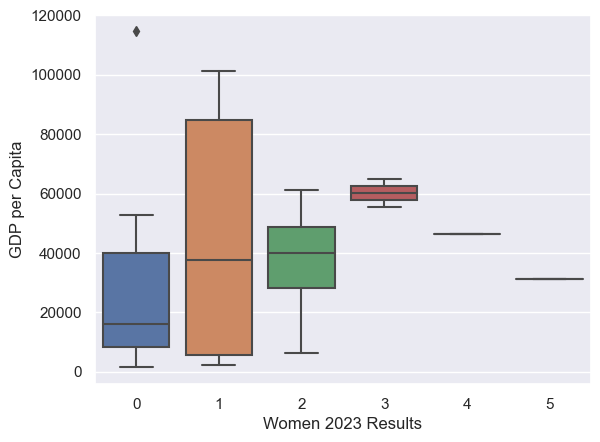

In [154]:
sns.boxplot(data=df,x='Women 2023 Results',y='GDP per Capita')

In [173]:
df[df['GDP per Capita'] == df['GDP per Capita'].max()]

,Squad,Goals For,Goals Against,xG Difference/90,Gender Equity,GDP per Capita,European,Women 2019 Results,Men 2022 Results,Women Rankings,Women 2023 Results
25,Rep. of Ireland,1,3,-0.79,-0.115,114581,True,-1,-1,22,0


<Axes: xlabel='Women 2023 Results', ylabel='Gender Equity'>

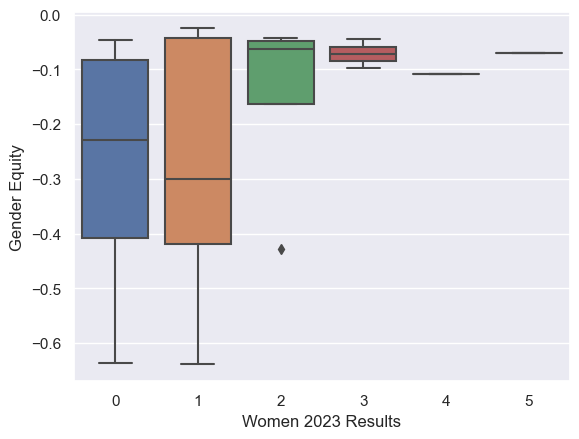

In [153]:
sns.boxplot(data=df,x='Women 2023 Results',y='Gender Equity')

In [176]:
df_stage2 = df[df['Women 2023 Results'] == 2]
df_stage2[df_stage2['Gender Equity'] == df_stage2['Gender Equity'].min()]

,Squad,Goals For,Goals Against,xG Difference/90,Gender Equity,GDP per Capita,European,Women 2019 Results,Men 2022 Results,Women Rankings,Women 2023 Results
7,Colombia,6,4,-0.43,-0.428,6417,False,-1,-1,25,2


And the teams that make it deep into the tournament, stage 2 and onwards, generally have high values for gender equity and GDP/capita.

<Axes: xlabel='GDP per Capita', ylabel='Gender Equity'>

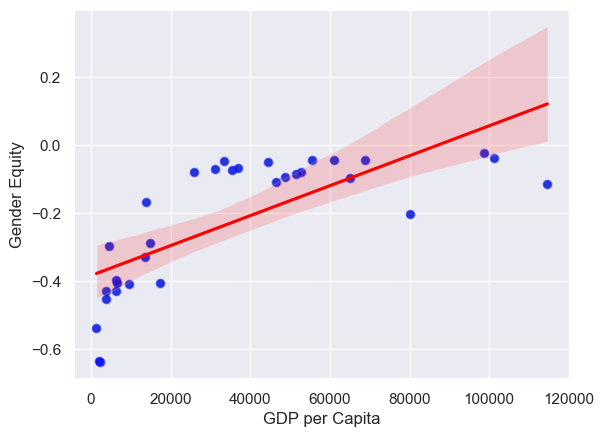

In [152]:
sns.scatterplot(data=df,x='xG Difference/90', y='Gender Equity')
sns.regplot(x = df['GDP per Capita'], y = df['Gender Equity'],
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})

<Axes: xlabel='xG Difference/90', ylabel='Gender Equity'>

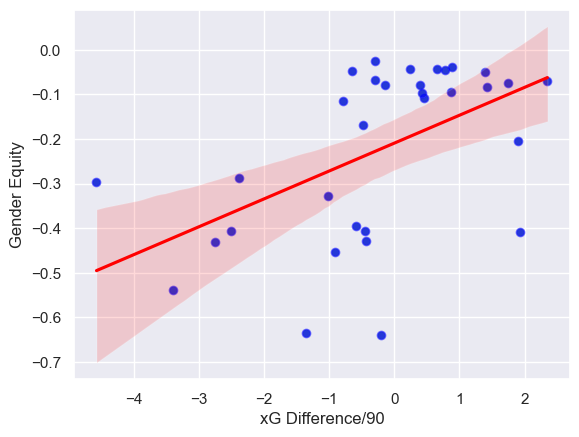

In [171]:
sns.scatterplot(data=df,x='xG Difference/90', y='Gender Equity')
sns.regplot(x = df['xG Difference/90'], y = df['Gender Equity'],
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})

<Axes: xlabel='xG Difference/90', ylabel='GDP per Capita'>

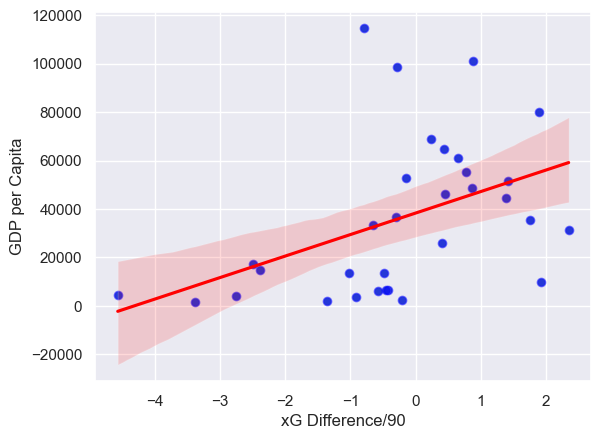

In [172]:
sns.scatterplot(data=df,x='xG Difference/90', y='GDP per Capita')
sns.regplot(x = df['xG Difference/90'], y = df['GDP per Capita'],
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})

<Axes: xlabel='Men 2022 Results', ylabel='Women 2023 Results'>

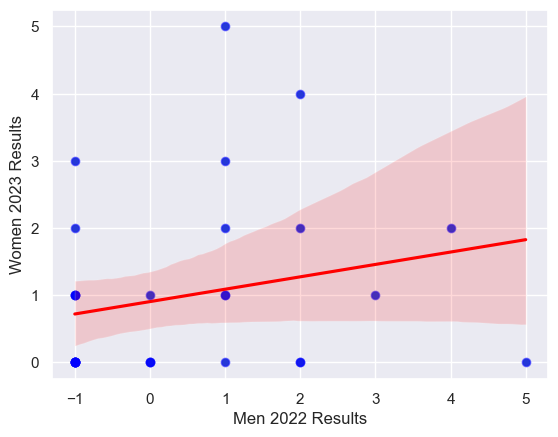

In [178]:
sns.scatterplot(data=df,x='Men 2022 Results', y='Women 2023 Results')
sns.regplot(x = df['Men 2022 Results'], y = df['Women 2023 Results'],
            scatter_kws = {"color": "blue", "alpha": 0.5},
            line_kws = {"color": "red"})

Now, I will build a linear regression model with the sports columns to predict the GDP/capita. I decided it would be a better y value to test because it is less discrete than the 2023 cup results, and it correlates quite well with the aforementioned x values. 

In [177]:
df.columns

Index(['Squad', 'Goals For', 'Goals Against', 'xG Difference/90',
       'Gender Equity', 'GDP per Capita', 'European', 'Women 2019 Results',
       'Men 2022 Results', 'Women Rankings', 'Women 2023 Results'],
      dtype='object')

In [179]:
X = df[['xG Difference/90','Women 2019 Results','Men 2022 Results','Women Rankings','Women 2023 Results']]

In [180]:
y = df['GDP per Capita']

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [183]:
from sklearn.linear_model import LinearRegression 

In [184]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [185]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
xG Difference/90,1137.939913
Women 2019 Results,3180.952388
Men 2022 Results,-1326.601070
Women Rankings,-657.430233
Women 2023 Results,-1966.248787


Negative coefficient for the 2022 and 2023 tournaments is unexpected, but with a very small data set, is not too surprising. This anomaly would likely disappear if more tournaments are added to the set. 

In [186]:
predictions = lm.predict(X_test)

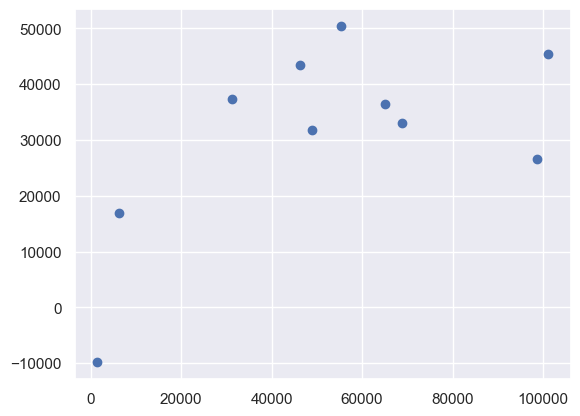

In [187]:
plt.scatter(y_test,predictions)

In [188]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24509.238045970655
MSE: 1100660752.9505918
RMSE: 33176.207633643


The MAE is not horrible for such a tiny data set. If I had more time, I would like to see how adding more tournament results and countries to the data set would improve the results of this regression. Additionally, it would be interesting to add more game-time stats about each of the teams to predict their tournament results. 